# Inference

In [1]:
import bnlearn
import pandas as pd
import read_bayesnet
from read_bayesnet import BayesianNetwork, Variable
from time import time
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/artfer/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Reading a file and getting its properties

In [2]:
bn = BayesianNetwork(file='bifs/asia.bif') 
for v in bn.variables:
    print('node : ',v.name,'\nparents : ',v.parents,'\nmarkov blanket : ',v.markov_blanket,'\nprobs : ',v.probabilities,'\n')

node :  asia 
parents :  [] 
markov blanket :  ['asia', 'tub'] 
probs :  {'yes': 0.01, 'no': 0.99} 

node :  tub 
parents :  ['asia'] 
markov blanket :  ['asia', 'tub', 'either'] 
probs :  {('yes',): {'yes': 0.05, 'no': 0.95}, ('no',): {'yes': 0.01, 'no': 0.99}} 

node :  smoke 
parents :  [] 
markov blanket :  ['lung', 'smoke', 'bronc'] 
probs :  {'yes': 0.5, 'no': 0.5} 

node :  lung 
parents :  ['smoke'] 
markov blanket :  ['lung', 'smoke', 'either'] 
probs :  {('yes',): {'yes': 0.1, 'no': 0.9}, ('no',): {'yes': 0.01, 'no': 0.99}} 

node :  bronc 
parents :  ['smoke'] 
markov blanket :  ['smoke', 'bronc', 'dysp'] 
probs :  {('yes',): {'yes': 0.6, 'no': 0.4}, ('no',): {'yes': 0.3, 'no': 0.7}} 

node :  either 
parents :  ['lung', 'tub'] 
markov blanket :  ['tub', 'either', 'lung', 'xray', 'dysp'] 
probs :  {('yes', 'yes'): {'yes': 1.0, 'no': 0.0}, ('no', 'yes'): {'yes': 1.0, 'no': 0.0}, ('yes', 'no'): {'yes': 1.0, 'no': 0.0}, ('no', 'no'): {'yes': 0.0, 'no': 1.0}} 

node :  xray 
par

## Running the algorithm
First, let's run with the default iterations (100) plus warm up (1.000)

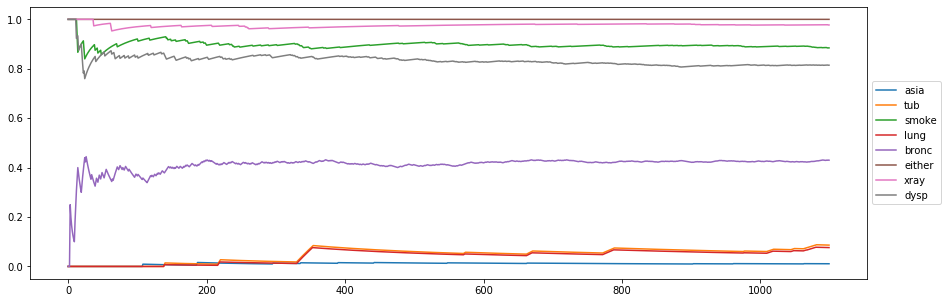

It took 0.18 seconds


In [3]:
start = time()
res, df = bn.gibbs_sampling(query=False)
end = time()

df.plot(figsize=(15,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

print('It took',round(end-start,2),'seconds')

It looks like it could benefit some extra iterations. Let's try with 1.000 iterations

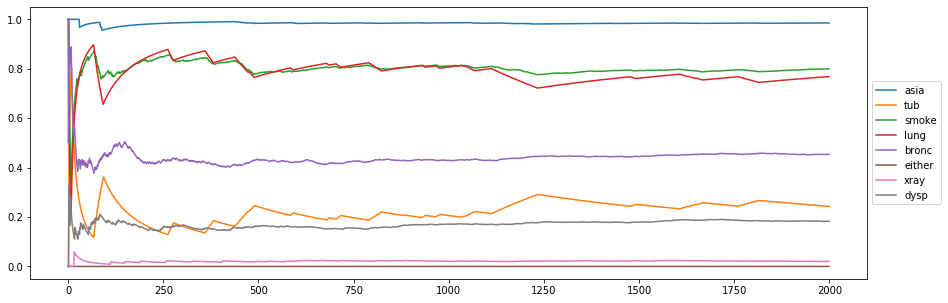

It took 0.32 seconds


In [4]:
start = time()
res, df = bn.gibbs_sampling(iterations=1000, query=False)
end = time()

df.plot(figsize=(15,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

print('It took',round(end-start,2),'seconds')

Much better. And execution time is also very good.<br>
Let's test with another, bigger net. The alarm net. We wont' print its properties here since there are to many, but just to give an ideia there are 37 nodes and 509 parameters.

In [5]:
bn = BayesianNetwork(file='bifs/alarm.bif') 

Again let's start with the defaults

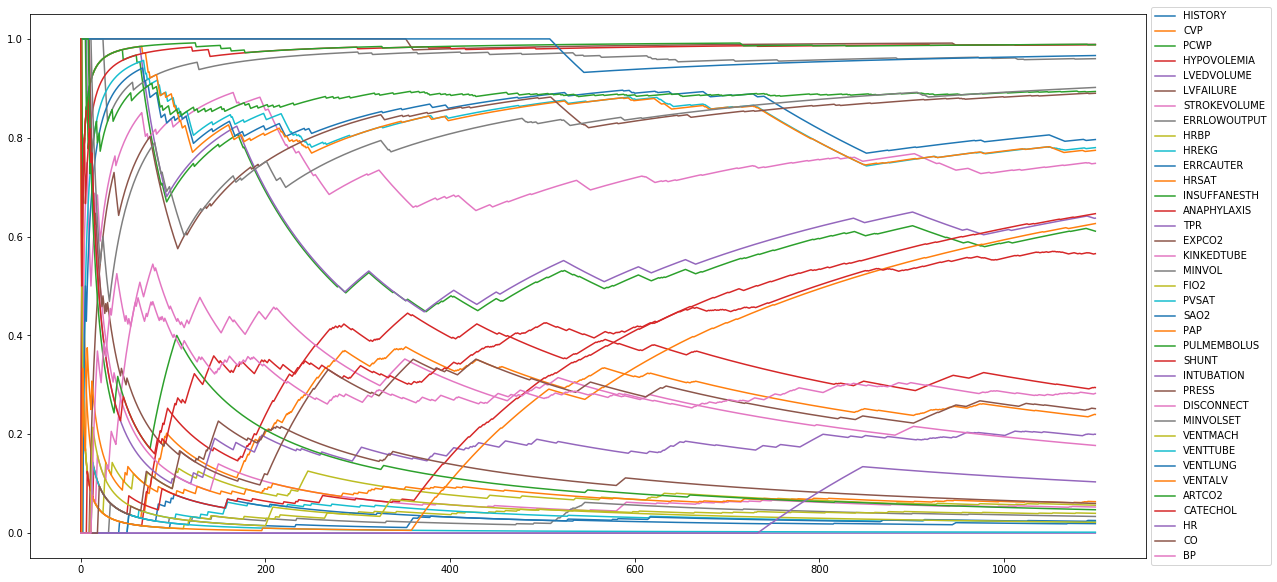

It took 1.4 seconds


In [6]:
start = time()
res, df = bn.gibbs_sampling(query=False)
end = time()

df.plot(figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

print('It took',round(end-start,2),'seconds')

Comparing with the asia net, we can see that the numbers of nodes and parameters really affects execution time. Not only that but are definitely not converging.
<br>Let's try again for 1.000 iterations

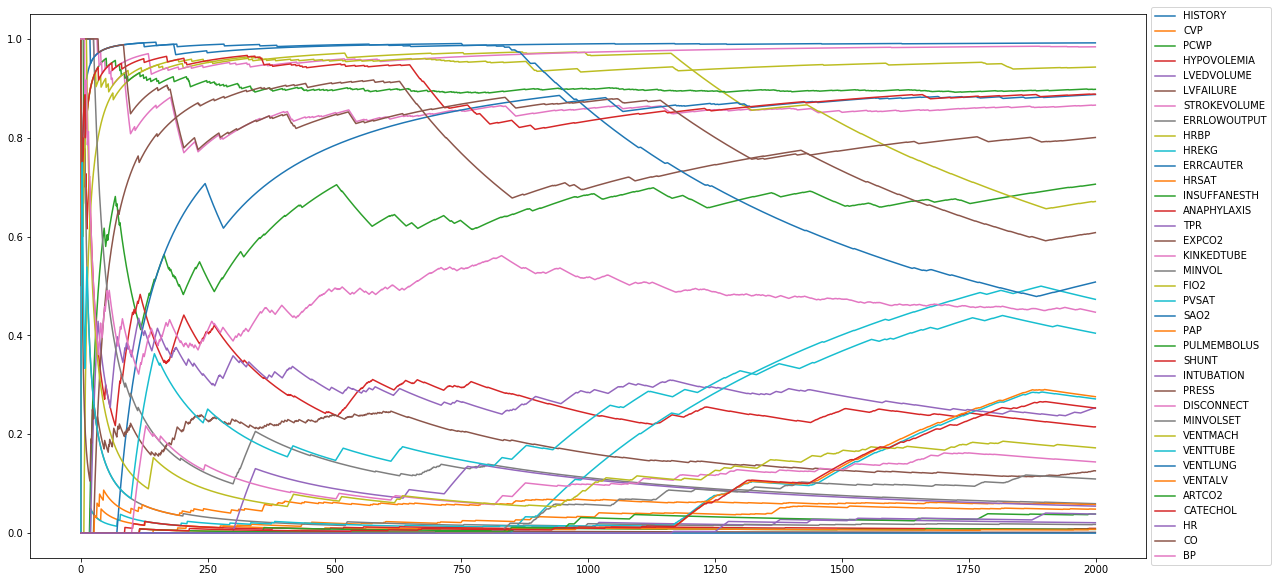

It took 2.57 seconds


In [7]:
start = time()
res, df = bn.gibbs_sampling(iterations=1000,query=False)
end = time()

df.plot(figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

print('It took',round(end-start,2),'seconds')

Way better than with the defaults, but still not there. Now with 50.000 iterations

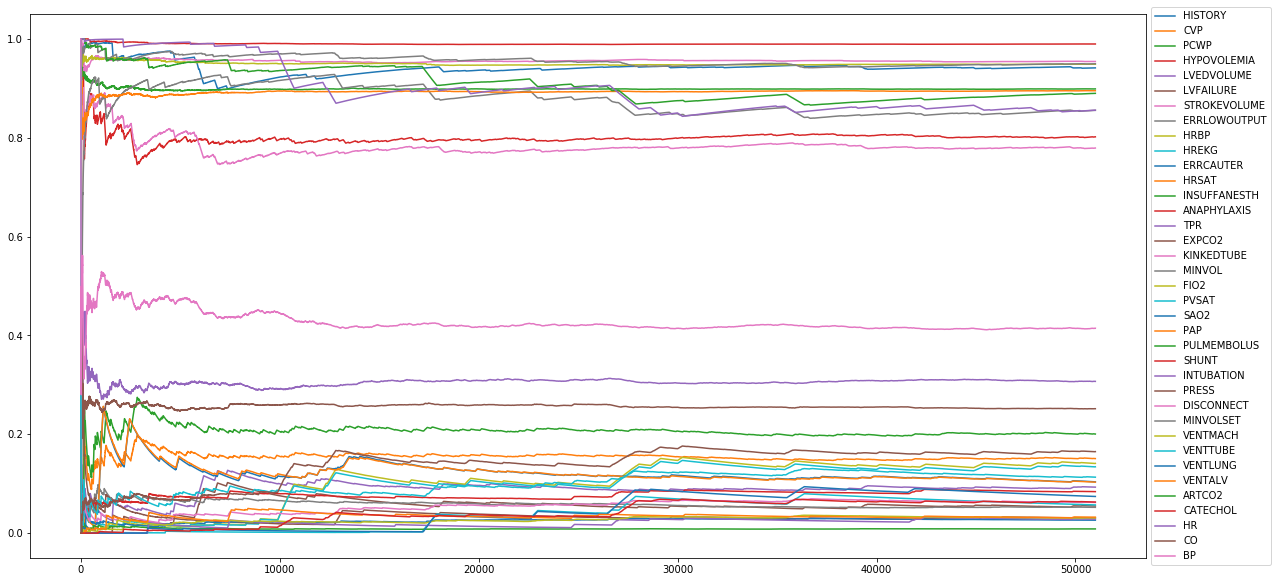

It took 66.55 seconds


In [8]:
start = time()
res, df = bn.gibbs_sampling(iterations=50000,query=False)
end = time()

df.plot(figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

print('It took',round(end-start,2),'seconds')

Even with 50.000 iterations, not all variables have converged. And execution time is not very good. This is a tough net. <br>
Last one, 100.000 iterations. This is going to take a while...

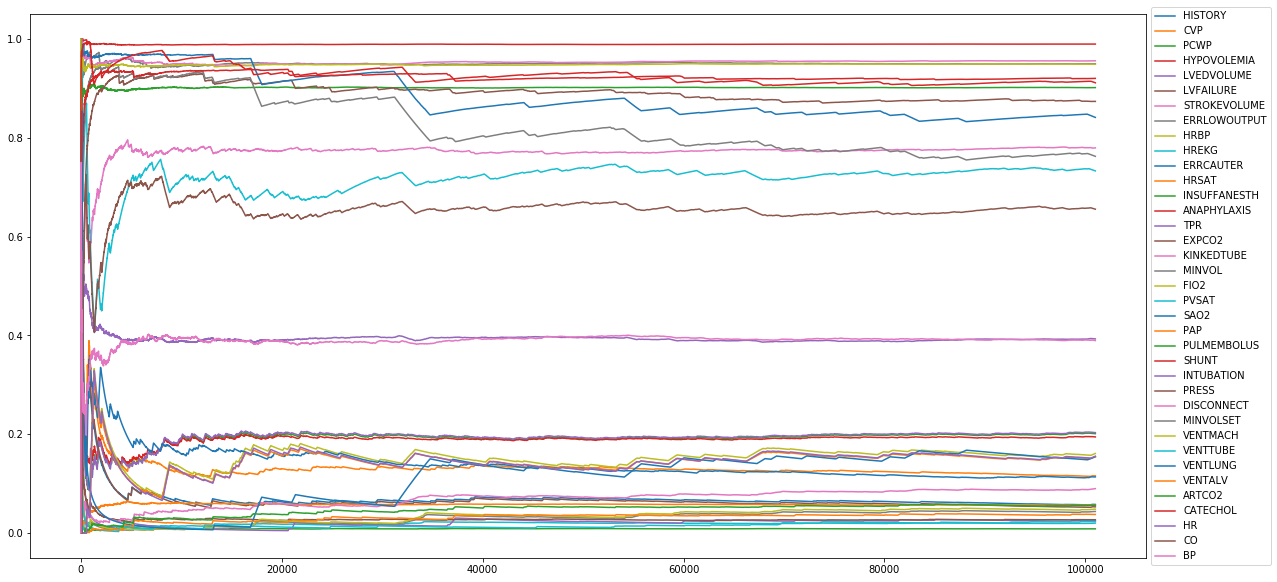

It took 128.86 seconds


In [9]:
start = time()
res, df = bn.gibbs_sampling(iterations=100000,query=False)
end = time()

df.plot(figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

print('It took',round(end-start,2),'seconds')

That's it for us. If you're seeing this in the interactive notebook, feel free to try with even more iterations.

# Using the bnlearn package and comparing
For the sake our sanity, let's go back to the asia net.<br>
In this section we're going to compare probabilities and execution time with the bnlearn package.<br>
Due to some strange errors we only managed to run the forward sampling algorithm.

In [10]:
DAG = bnlearn.import_DAG('bifs/asia.bif', verbose=0)
bn = BayesianNetwork(file='bifs/asia.bif') 

In [11]:
start = time()
df = bnlearn.sampling(DAG, n=11000, verbose=0) # get samples
end = time()
print('It took',round(end-start,2),'seconds')

Generating for node: xray: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]  

It took 4.01 seconds


In [12]:
start = time()
res, _ = bn.gibbs_sampling(iterations=10000, query=True)
end = time()
print('It took',round(end-start,2),'seconds')

It took 1.71 seconds


Altough it's not the same algorithm, and thus this isn't a fair comparision, our method is quite faster.<br>
Let's compare probabilities

In [13]:
for var in df.columns:
    print('Our prob:',res[var])
    print(df.groupby(var).size().div(len(df)), '\n')

Our prob: {'yes': 0.84, 'no': 0.16}
smoke
0    0.500182
1    0.499818
dtype: float64 

Our prob: {'yes': 0.55, 'no': 0.45}
bronc
0    0.451273
1    0.548727
dtype: float64 

Our prob: {'yes': 0.85, 'no': 0.15}
lung
0    0.055091
1    0.944909
dtype: float64 

Our prob: {'yes': 0.02, 'no': 0.98}
asia
0    0.011636
1    0.988364
dtype: float64 

Our prob: {'yes': 0.16, 'no': 0.84}
tub
0    0.009909
1    0.990091
dtype: float64 

Our prob: {'yes': 1.0, 'no': 0.0}
either
0    0.064273
1    0.935727
dtype: float64 

Our prob: {'yes': 0.81, 'no': 0.19}
dysp
0    0.441
1    0.559
dtype: float64 

Our prob: {'yes': 0.98, 'no': 0.02}
xray
0    0.112273
1    0.887727
dtype: float64 



Many of the variables have very similiar probabilities, so we can assume that they are converging to the correct values.<br> We would like to add some more examples of different libraries, but unfortunatly we can't find any good/working one's, at least for Python. There is also the pgmpy API but it seems that the bnlearn API we're already using is based on that.  